In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# Data Wrangling

In [2]:
url = "https://gist.githubusercontent.com/ryanorsinger/0e223fb35472c40d449cec4c0737008b/raw/e9688a6b1c2806d9f685f8b9524b80def95f7c97/penguins.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
# Super quick way to count all your nulls by column_name
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [5]:
df.sex.value_counts()

male      168
female    165
Name: sex, dtype: int64

In [6]:
df.shape

(344, 8)

In [7]:
# quick and easy drop nulls
# only if you know you want to drop the rows/columns with nulls
# defaults to rows, but we could specity the axis to mean columns
df = df.dropna()

In [8]:
df.shape

(333, 8)

In [9]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
# Filling the nulls with a specified value
# Business logic may mean that nulls = 0
# Mean, median, or mode might be the best bets

In [10]:
def remove_columns(df, cols_to_remove):  
    """Takes in a dataframe and a list of columns to remove"""
    df = df.drop(columns=cols_to_remove)
    return df

In [11]:
# Handling Nulls
# Drop the row/column from the data
# Replace nulls with a value
# Replace with zero if we know that null means zero
# Replace with a value that makes sense from the business perspective

In [12]:
df.year.value_counts()

2009    117
2008    113
2007    103
Name: year, dtype: int64

# What if our columns are more/less imporant to the outcome
- Use your best judgement if you can/should 86 that column or strive to keep it

- sqft
- bedroom
- bathroom
- lat/long
- number_of_utility_closets
- number_of_fireplaces
- number_of_cat_patios
- number_of_basketball_courts
- number_of_tennis_courts

In [13]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .75):
    threshold = int(round(prop_required_column*len(df.index),0))
    
    # Axis=1 means column
    df.dropna(axis=1, thresh=threshold, inplace=True)
    
    threshold = int(round(prop_required_row*len(df.columns),0))
    
    # axis=0 means rows
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [14]:
df = handle_missing_values(df)

In [15]:
numbers = pd.Series(np.arange(1, 101))

In [16]:
numbers.median()

50.5

In [17]:
# 50% is the median, also called Q2
# the 25% is the median between the min and the median, Q1
# The 75% is the median between the median and the highest value
numbers.describe()

count    100.000000
mean      50.500000
std       29.011492
min        1.000000
25%       25.750000
50%       50.500000
75%       75.250000
max      100.000000
dtype: float64

In [18]:
q1 = numbers.quantile(0.25)
q3 = numbers.quantile(0.75)

In [19]:
iqr = q3 - q1
iqr

49.5

In [20]:
k = 1.5
lower_bound = q1 - (k * iqr)

higher_bound = q3 + (k * iqr)

In [21]:
lower_bound

-48.5

In [22]:
lower_outliers = numbers[numbers < lower_bound]
lower_outliers

Series([], dtype: int64)

In [23]:
higher_bound

149.5

In [24]:
upper_outliers = numbers[numbers > higher_bound]
upper_outliers

Series([], dtype: int64)

In [25]:
df = df.dropna()

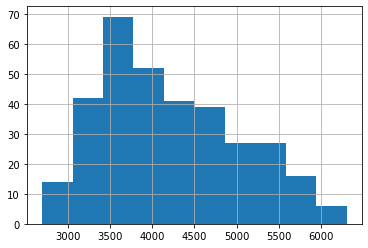

In [26]:
# Skinny penguin outliers and Chonky penguin outliers
# body_mass_g

df.body_mass_g.hist()

In [27]:
# q2 is the median, 
q1 = df.body_mass_g.quantile(0.25)
q3 = df.body_mass_g.quantile(0.75)

q1, q3
iqr = q3 - q1

In [28]:
# k=1.5 gets rid of more outliers (mild outliers)
# k=3 keeps more outliers (medium outliers)
k = 1.5
upper_bound = q3 + (k * iqr)
upper_bound

6612.5

In [29]:
# Empty set for upper bound outliers
df[df.body_mass_g > upper_bound]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year


In [30]:
lower_bound = q1 - (k * iqr)
lower_bound 

1712.5

In [31]:
df[df.body_mass_g < lower_bound]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year


![chunky penguin](https://www.wpclipart.com/animals/birds/P/penguins/penguin_chunky.png)

## Best Practices
- Handle nulls
    - Remove rows/column if there's "too many" nulls. How many is too many? It depends.
    - Replace
- Remove outliers
- Split
- Scale